In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-london-scikit-learn/trainLabels.csv
/kaggle/input/data-science-london-scikit-learn/train.csv
/kaggle/input/data-science-london-scikit-learn/test.csv


In [88]:
## import libraries

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Evaluation
from sklearn.metrics import accuracy_score

## Interface: https://blog.konghy.cn/2017/12/16/python-warnings/
import warnings
warnings.filterwarnings('ignore')

In [89]:
## import datasets
train = pd.read_csv('../input/data-science-london-scikit-learn/train.csv')
test = pd.read_csv('../input/data-science-london-scikit-learn/test.csv')
train_label = pd.read_csv('../input/data-science-london-scikit-learn/trainLabels.csv')

In [90]:
print(train.shape)
print(test.shape)
print(train_label.shape)
train.head()

(999, 40)
(8999, 40)
(999, 1)


,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.85046544625016463,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663
0,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
1,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
2,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
3,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
4,-0.773247,-0.123227,0.047423,-0.210266,10.377793,0.526604,-2.751616,0.315541,0.608603,-0.043421,...,-1.487714,0.792790,-0.540711,0.114115,-0.277477,-0.896411,-2.805207,0.469162,3.614157,0.081689


In [91]:
## 統計資訊
train.describe()

,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.85046544625016463,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.025322,-0.023323,-0.025612,-0.001096,1.088127,-0.006465,0.495433,-0.039517,0.026469,-0.004264,...,0.031533,0.023598,-0.541199,-0.011913,-0.487548,0.032686,0.564443,0.009574,-0.890867,0.609960
std,1.008750,1.016094,0.978412,0.970349,4.539161,0.989601,2.119020,2.232776,1.001562,1.013808,...,1.011767,1.001668,2.240688,1.022922,2.118491,1.007316,2.227304,0.994404,2.022240,2.046400
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.670358,-0.690859,-0.700048,-0.616548,-1.805683,-0.733114,-0.839542,-1.607010,-0.680114,-0.682246,...,-0.659295,-0.696257,-2.123069,-0.664966,-1.880040,-0.643513,-1.060154,-0.689890,-2.214672,-0.565156
50%,0.023121,-0.031181,0.008037,0.003735,0.858932,0.025803,0.571475,0.017761,0.022855,-0.037531,...,0.049792,0.050187,-0.568168,-0.028179,-0.493701,0.036975,0.453544,0.038464,-0.853259,0.780175
75%,0.762980,0.683464,0.657948,0.640968,3.836911,0.671494,1.912284,1.436715,0.741949,0.666416,...,0.747815,0.700093,0.940334,0.651692,0.997741,0.690139,2.120006,0.693603,0.390982,1.994308
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   0.29940251144353242    999 non-null    float64
 1   -1.2266241875260637    999 non-null    float64
 2   1.4984250500215328     999 non-null    float64
 3   -1.1761503610375272    999 non-null    float64
 4   5.2898525545597037     999 non-null    float64
 5   0.20829711393323402    999 non-null    float64
 6   2.4044983672405826     999 non-null    float64
 7   1.5945062220589785     999 non-null    float64
 8   -0.051608163273514231  999 non-null    float64
 9   0.66323431039687908    999 non-null    float64
 10  -1.4083700642531511    999 non-null    float64
 11  1.1147436351160869     999 non-null    float64
 12  0.91041530967390116    999 non-null    float64
 13  2.2181103179158135     999 non-null    float64
 14  4.3056427290235391     999 non-null    float64
 15  0.0889

In [101]:
## np.ravel: https://blog.csdn.net/tymatlab/article/details/79009618
X, y = train, np.ravel(train_label)
y

(999,)

In [102]:
## 拆成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## KNN

In [95]:
algorithm = ['auto', 'ball_tree', 'brute']
weights = ['uniform', 'distance']
neig = range(1, 40)
train_accuracy = []
test_accuracy = []
best_score = 0.0
best_knn = None

Train Score:  0.9265687583444593
Test Score:  0.94
KNeighborsClassifier(n_neighbors=11)


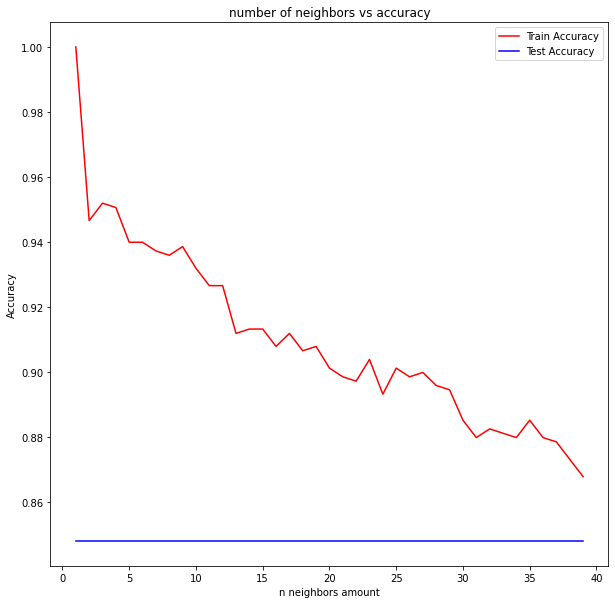

In [96]:
for k in neig:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'auto', weights = 'uniform')
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    train_score = KNN.score(X_train, y_train)
    test_score = accuracy_score(y_test, y_pred)
    
    train_accuracy.append(train_score)
    test_accuracy.append(val_score)
    
    ## 找出最佳的準確度
    if test_score > best_score:
        best_score = test_score
        best_knn = KNN
    
## 視覺化: 了解設定什麼k值有最佳的準確度
plt.figure(figsize = (10, 10))
plt.plot(neig, train_accuracy, c = 'red', label = 'Train Accuracy')
plt.plot(neig, test_accuracy, c = 'blue', label = 'Test Accuracy')
plt.title('number of neighbors vs accuracy')
plt.xlabel('n neighbors amount')
plt.ylabel('Accuracy')
plt.legend()

print('Train Score: ', best_knn.score(X_train, y_train))
print('Test Score: ', best_score)
print(best_knn)    

## Random Forest

In [97]:
clf = RandomForestClassifier(random_state = 10)
n_estimators = [20, 30, 60, 90, 120, 140]
max_depth = [1, 7, 10, 20, 40]
split = [5, 10, 17, 20]

param = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = split)

grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(X_train, y_train)

y_pred = grid_result.predict(X_test)
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.1min finished


Best Accuracy: 0.850398 using {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 140}


In [98]:
print('Train Score: ', grid_result.score(X_train, y_train))
print('Test Score: ', accuracy_score(y_pred, y_test))

Train Score:  0.9973297730307076
Test Score:  0.896


## SVC Model

In [99]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(X_train, y_train)
y_pred = SVCModel.predict(X_test)
print('Train Score: ', SVCModel.score(X_train, y_train))
print('Test Score: ', accuracy_score(y_pred, y_test))


Train Score:  0.8518024032042724
Test Score:  0.892


In [100]:
y_pred.shape

(250,)

## Gaussian Mixture Model
https://ithelp.ithome.com.tw/articles/10195700
https://ithelp.ithome.com.tw/articles/10206244

In [103]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

pca = PCA(0.95,whiten=True)
train_pc = pca.fit_transform(train)
test_pc = pca.transform(test)
print(train_pc.shape)
print(test_pc.shape)

(999, 29)
(8999, 29)


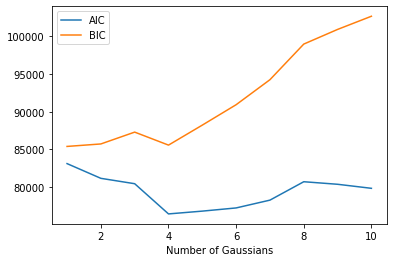

In [104]:
# Let's fit GMM with various number of components
n_components = np.arange(1,11)
models = [GaussianMixture(n, covariance_type='full', random_state=100) 
          for n in n_components]
aics = [model.fit(train_pc).aic(train_pc) for model in models]
bics = [model.fit(train_pc).bic(train_pc) for model in models]

plt.plot(n_components, aics, label='AIC')
plt.plot(n_components, bics, label='BIC')
plt.xlabel('Number of Gaussians')
plt.legend()
plt.show()

In [109]:
best_gmm = GaussianMixture(n_components=4, covariance_type='full').fit(train_pc)

# Let's apply the model to get probabilities
train_gmm = best_gmm.predict_proba(train_pc)
test_gmm = best_gmm.predict_proba(test_pc)
print(train_gmm.shape)
print(test_gmm.shape)

# Split the new data into train and validadtion set
X_train_gmm, X_val_gmm, y_train_gmm, y_val_gmm = train_test_split(train_gmm, train_label, random_state=42, test_size=0.2)

(999, 4)
(8999, 4)


In [107]:
# print('X shape: ', X.shape)
# print('\n')

# lowest_bic = np.infty
# bic = []

# cv_types = ['tied', 'full', 'diag', 'spherical']

# for ct in cv_types:
#     for n_components in range(1, 8):
#         gmm = GaussianMixture(n_components = n_components,covariance_type = ct)
#         gmm.fit(X)
#         bic.append(gmm.aic(X))
#         if bic[-1] < lowest_bic:
#             lowest_bic = bic[-1]
#             best_gmm = gmm
# best_gmm.fit(X)
# gmm_train = best_gmm.predict_proba(X_train)
# gmm_val = best_gmm.predict_proba(X_test)
# gmm_test = best_gmm.predict_proba(test)
# print(gmm.aic(X))

In [110]:
# print("gmm test: ", gmm_val.shape)
# print("gmm_train: ", gmm_train.shape)
# print("X train: ", X_train.shape)
# print('X test: ', X_test.shape)

## 將Gaussian Mixture Model重新將數據集聚類的結果，再應用回KNN、RandomForest、SVC

In [116]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(X_train_gmm, y_train_gmm)
y_pred = SVCModel.predict(gmm_val)
print('Train Score: ', SVCModel.score(X_train_gmm, y_train_gmm))
print('Test Score: ', SVCModel.score(X_val_gmm, y_val_gmm))


Train Score:  0.9937421777221527
Test Score:  0.99


In [122]:
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(train_gmm, train_label)
y_pred = SVCModel.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': train_gmm, train_labe}
submission = pd.DataFrame(submission)
submission.to_csv('svc_submission.csv', index=False)

## KNN

Train Score:  1.0
Test Score:  0.99
KNeighborsClassifier(n_neighbors=1)


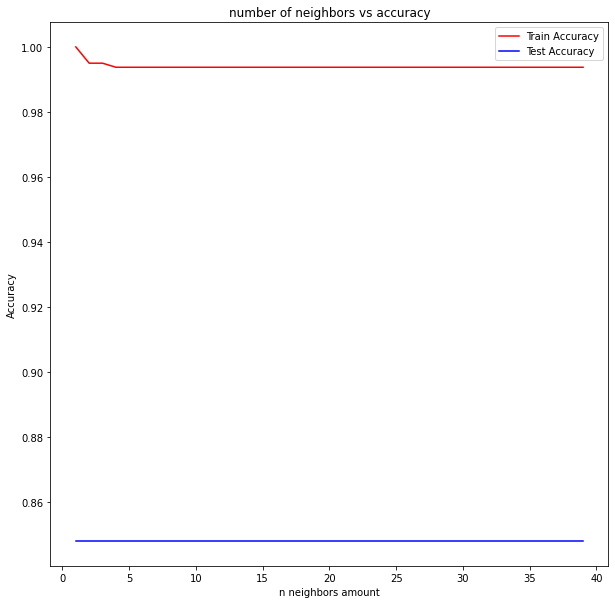

In [114]:
algorithm = ['auto', 'ball_tree', 'brute']
weights = ['uniform', 'distance']
neig = range(1, 40)
train_accuracy = []
test_accuracy = []
best_score = 0.0
best_knn = None

for k in neig:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'auto', weights = 'uniform')
    KNN.fit(X_train_gmm, y_train_gmm)
    y_pred = KNN.predict(gmm_val)
    train_score = KNN.score(X_train_gmm, y_train_gmm)
    test_score = KNN.score(X_val_gmm, y_val_gmm)
    
    train_accuracy.append(train_score)
    test_accuracy.append(val_score)
    
    ## 找出最佳的準確度
    if test_score > best_score:
        best_score = test_score
        best_knn = KNN
    
## 視覺化: 了解設定什麼k值有最佳的準確度
plt.figure(figsize = (10, 10))
plt.plot(neig, train_accuracy, c = 'red', label = 'Train Accuracy')
plt.plot(neig, test_accuracy, c = 'blue', label = 'Test Accuracy')
plt.title('number of neighbors vs accuracy')
plt.xlabel('n neighbors amount')
plt.ylabel('Accuracy')
plt.legend()

print('Train Score: ', best_knn.score(X_train_gmm, y_train_gmm))
print('Test Score: ', best_score)
print(best_knn)   

In [ ]:
best_knn.fit(train_gmm, train_label)
ypred = best_knn.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': ypred}
submission = pd.DataFrame(submission)
submission.to_csv('knn_submission.csv', index=False)

## RandomForest

In [115]:
clf = RandomForestClassifier(random_state = 10)
n_estimators = [20, 30, 60, 90, 120, 140]
max_depth = [1, 7, 10, 20, 40]
split = [5, 10, 17, 20]

param = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = split)

grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(X_train_gmm, y_train_gmm)


print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print('Train Score: ', grid_result.score(X_train_gmm, y_train_gmm))
print('Test Score: ', grid_result.score(X_val_gmm, y_val_gmm))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   40.8s finished


Best Accuracy: 0.994992 using {'max_depth': 1, 'min_samples_split': 5, 'n_estimators': 140}
Train Score:  0.9949937421777222
Test Score:  0.985


In [126]:
grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(train_gmm, train_label)
y_pred = grid_result.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': ypred}
submission = pd.DataFrame(submission)
submission.to_csv('randomforest_submission.csv', index=False)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   45.0s finished
